### Dedicated notebook for the timegraph idea

- create a time based graph with 2 timesteps
- Visualize it
- Analyze it with subgraph isomorphism

In [1]:
from graph_creator.ActorTimeGraph import ActorTimeGraph

import pandas as pd
pd.set_option('display.max_colwidth', None)

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.spatial import distance
import xml.etree.ElementTree as ET
from shapely.geometry import Polygon, LineString
import pandas as pd
#from src.generate_traffic_data import clean_carla, spawn_scene, run_scene
import carla
import os
os.getcwd()
from datetime import datetime
import time
import random
from tqdm import tqdm
import networkx as nx
import numpy as np
import pickle

os.chdir('../..')
os.getcwd()


from graph_creator.MapGraph import MapGraph
from graph_creator.ActorGraph import ActorGraph
from graph_creator.utilities import make_node_edge_df
from graph_creator.plot_graphs import plot_lane_map_advanced, add_actors_to_map, add_actor_edges_to_map

In [2]:
files = os.listdir("/home/tmuehlen/repos/graph_coverage/carla/data")
scn_ids = [file.split("_")[1] for file in files if "tracks" in file]
scn_ids = sorted(scn_ids)
scn_ids = [scn_id for scn_id in scn_ids if scn_id > "2025-09-05"]
print(len(scn_ids))
scn_id = scn_ids[200]
#scn_ids

303


In [3]:
tracks = pd.read_parquet(f'/home/tmuehlen/repos/graph_coverage/carla/data/scene_{scn_id}_tracks.parquet')
tracks['road_lane_id'] = tracks.road_id.astype(str) + '_' + tracks.lane_id.astype(str)
print(tracks.shape)

timestamps = tracks.timestamp.unique().tolist()
actors = tracks.actor_id.unique().tolist()
#tracks.head(2).T


(12600, 28)


In [4]:
print(scn_id)
g_map = MapGraph()
g_map.read_graph_from_file(f'/home/tmuehlen/repos/graph_coverage/carla/data/scene_{scn_id}_map_graph.pickle')
# #g_map.visualize_graph()
# fig, ax = plot_lane_map_advanced(g_map.graph, color_by_length=True, cmap='plasma', show_labels=False)
# plt.show()


2025-09-14 21:57:31.223116


In [5]:
ag = ActorGraph()
ag_carla = ag.from_carla_scenario(tracks, 
    g_map, 
    max_distance_lead_veh_m=30, 
    max_distance_neighbor_forward_m=30, 
    max_distance_neighbor_backward_m=30, 
    # max_distance_opposite_veh_m=30,
    )
ag_carla.actor_graphs.keys()

# clean up the graphs and components, i.e. remove components with only one node:
keys = list(ag_carla.actor_graphs.keys())
for  key in keys:
    ag_carla.actor_components[key] = [ag_carla.actor_components[key][i] for i in range(len(ag_carla.actor_components[key])) if ag_carla.actor_components[key][i].size() > 1]

#pd.DataFrame(ag_carla.actor_graphs[5.5085996149573475].nodes(data=True)).iloc[0,1]
ag_timestamps = list(ag_carla.actor_graphs.keys())
ag_carla.actor_graphs[ag_timestamps[0]].nodes(data=True)
ag_carla.actor_graphs[ag_timestamps[0]].edges(data=True)


OutMultiEdgeDataView([('1858', '1822', {'edge_type': 'opposite_vehicle', 'path_length': 51.735839657485485}), ('1858', '1854', {'edge_type': 'opposite_vehicle', 'path_length': 72.74876141175628}), ('1858', '1841', {'edge_type': 'opposite_vehicle', 'path_length': 84.23584204167128}), ('1857', '1822', {'edge_type': 'neighbor_vehicle', 'path_length': -7.250004053115845}), ('1857', '1841', {'edge_type': 'neighbor_vehicle', 'path_length': -25.249998331069946}), ('1856', '1846', {'edge_type': 'neighbor_vehicle', 'path_length': 10.903111100196838}), ('1855', '1851', {'edge_type': 'following_lead', 'path_length': 23.88008503615856}), ('1855', '1839', {'edge_type': 'neighbor_vehicle', 'path_length': -9.00004467368126}), ('1854', '1842', {'edge_type': 'following_lead', 'path_length': 25.75349858403206}), ('1854', '1858', {'edge_type': 'opposite_vehicle', 'path_length': 72.74876141175628}), ('1852', '1827', {'edge_type': 'neighbor_vehicle', 'path_length': -28.75172059237957}), ('1851', '1828', {'

In [6]:
ag_carla_time = ActorTimeGraph(ag_carla)
ag_carla_time.create_actor_time_graphs()

# clean up the graphs and components, i.e. remove components with only one node:
keys = list(ag_carla_time.actor_time_graphs.keys())
for  key in keys:
    ag_carla_time.actor_time_components[key] = [ag_carla_time.actor_time_components[key][i] for i in range(len(ag_carla_time.actor_time_components[key])) if ag_carla_time.actor_time_components[key][i].size() > 1]


In [7]:
ag_carla_time.actor_time_graphs

{8.315389845520258: <networkx.classes.multidigraph.MultiDiGraph at 0x73f38834ebc0>,
 9.31538986042142: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2982c06d0>,
 10.31538987532258: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2982c1330>,
 11.315389890223742: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2982c13f0>,
 12.315389905124903: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2982c0640>,
 13.315389920026064: <networkx.classes.multidigraph.MultiDiGraph at 0x73f38834c550>,
 14.315389934927225: <networkx.classes.multidigraph.MultiDiGraph at 0x73f38834e800>,
 15.315389949828386: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2b77b3850>,
 16.315389964729548: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2b77b3ee0>,
 17.31538997963071: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2b77b3730>,
 18.31538999453187: <networkx.classes.multidigraph.MultiDiGraph at 0x73f290233fa0>,
 19.31539000943303: <networkx.classes.multidigraph.MultiDiGraph at 0x73

In [8]:
node_df, edge_df = make_node_edge_df(ag_carla_time.actor_time_graphs[ag_carla_time.timestamps[1]])


In [9]:
node_df

,node_id,0,1
0,1859,"{'lane_id': '589_-2', 'lane_ids': ['589_-2'], 's': 23.999998912215233, 'xyz': POINT Z (73.14004516601562 -206.16952514648438 -0.013427734375), 'lon_speed': 2.0639296387937156, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': True}","{'lane_id': '589_-2', 'lane_ids': ['589_-2'], 's': 22.999996200203896, 'xyz': POINT Z (74.16796875 -206.1436309814453 -0.0126174734905362), 'lon_speed': -7.87741784668413e-06, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': True}"
1,1858,"{'lane_id': '24_1', 'lane_ids': ['24_1'], 's': 28.99999463558197, 'xyz': POINT Z (-48.39121627807617 131.4371795654297 0.0208075903356075), 'lon_speed': 6.5853373334136585, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': False}","{'lane_id': '24_1', 'lane_ids': ['24_1'], 's': 24.24999913573265, 'xyz': POINT Z (-43.7438850402832 131.19252014160156 0.0226306524127722), 'lon_speed': 2.781125289127802, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': False}"
2,1857,"{'lane_id': '30_5', 'lane_ids': ['30_5'], 's': 70.99999523162842, 'xyz': POINT Z (4.974692344665527 46.8177375793457 -0.0036286353133619), 'lon_speed': 9.367812137651848, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': False}","{'lane_id': '30_5', 'lane_ids': ['30_5'], 's': 63.999996185302734, 'xyz': POINT Z (4.998720645904541 53.80275344848633 0.0035487173590809), 'lon_speed': 4.483720374112746, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': False}"
3,1856,"{'lane_id': '3_3', 'lane_ids': ['3_3'], 's': 14.25085762143135, 'xyz': POINT Z (-74.42208862304688 -25.160839080810547 -0.2394471317529678), 'lon_speed': 8.35093164096456, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': False}","{'lane_id': '3_3', 'lane_ids': ['3_3'], 's': 8.750391334295273, 'xyz': POINT Z (-74.39115905761719 -19.46225929260254 -0.1768590360879898), 'lon_speed': 3.4074318528053404, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': False}"
4,1855,"{'lane_id': '483_4', 'lane_ids': ['483_4'], 's': 18.000066816806793, 'xyz': POINT Z (82.96202087402344 4.318068981170654 -0.025641517713666), 'lon_speed': 8.055330146450915, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': True}","{'lane_id': '483_4', 'lane_ids': ['483_4'], 's': 12.500036045908928, 'xyz': POINT Z (77.36331176757812 4.306727886199951 -0.0259080305695534), 'lon_speed': 3.373706588751867, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': True}"
5,1854,"{'lane_id': '4_-1', 'lane_ids': ['4_-1'], 's': 76.26299810409546, 'xyz': POINT Z (-84.56690979003906 105.15147399902344 0.2729249596595764), 'lon_speed': 7.848751905631625, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': False}","{'lane_id': '4_-1', 'lane_ids': ['4_-1'], 's': 69.26190787553787, 'xyz': POINT Z (-84.56819152832031 98.22623443603516 0.4022963643074036), 'lon_speed': 4.562811343047964, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': False}"
6,1853,"{'lane_id': '8_-1', 'lane_ids': ['8_-1'], 's': 7.250033900141716, 'xyz': POINT Z (56.96172332763672 -4.2782793045043945 -0.0548530556261539), 'lon_speed': -2.6435821707971894e-08, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': False}","{'lane_id': '8_-1', 'lane_ids': ['8_-1'], 's': 7.25003008544445, 'xyz': POINT Z (56.96171188354492 -4.2784104347229 -0.0537931807339191), 'lon_speed': -1.5816819977065345e-05, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': False}"
7,1852,"{'lane_id': '3_-2', 'lane_ids': ['3_-2'], 's': 64.00834392011166, 'xyz': POINT Z (-88.53080749511719 -60.419212341308594 -0.7328524589538574), 'lon_speed': 4.746860746933666, 'actor_type': ActorType.VEHICLE, 'lane_change': False, 'is_on_intersection': False}","{'lane_id': '3_-2', 'lane_ids': ['

In [10]:
edge_df

,source,target,edge_type,path_length,time_lag
0,1858,1854,opposite_vehicle,60.997676,0
1,1858,1854,opposite_vehicle,72.748761,1
2,1858,1841,opposite_vehicle,76.985842,0
3,1858,1841,opposite_vehicle,84.235842,1
4,1858,1842,opposite_vehicle,92.752231,0
...,...,...,...,...,...
73,1823,1828,neighbor_vehicle,6.441095,0
74,1823,1828,neighbor_vehicle,-7.201349,1
75,1822,1857,neighbor_vehicle,3.469998,0
76,1822,1857,neighbor_vehicle,-7.250004,1


In [11]:
ag_carla.actor_graphs

{7.315389830619097: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2907dfee0>,
 8.315389845520258: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2907dfbb0>,
 9.31538986042142: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2907df2b0>,
 10.31538987532258: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2907def20>,
 11.315389890223742: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2907df8e0>,
 12.315389905124903: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2907dfd00>,
 13.315389920026064: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2907deef0>,
 14.315389934927225: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2907de860>,
 15.315389949828386: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2907dfac0>,
 16.315389964729548: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2907de830>,
 17.31538997963071: <networkx.classes.multidigraph.MultiDiGraph at 0x73f2907df310>,
 18.31538999453187: <networkx.classes.multidigraph.MultiDiGraph at 0x73

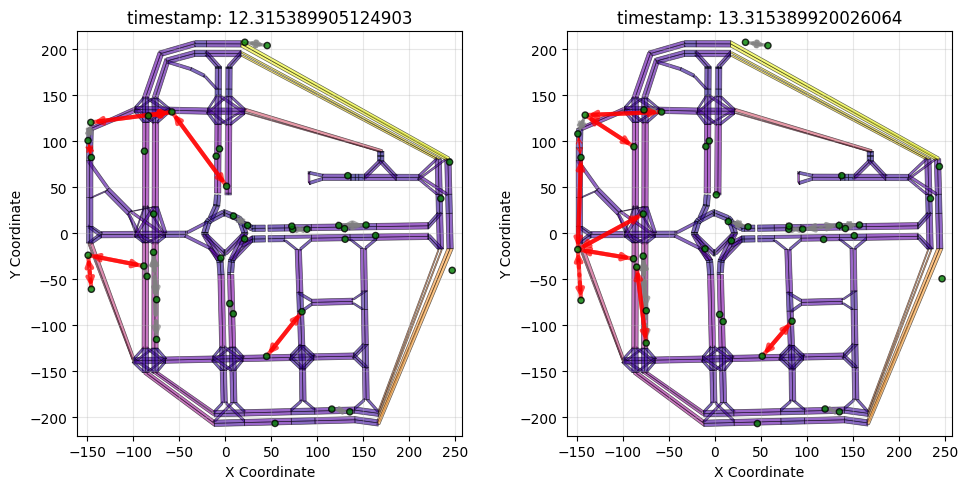

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
timestamps = sorted(list(ag_carla.actor_graphs.keys()))

t = 5
fig, ax1 = plot_lane_map_advanced(g_map.graph, figsize=None, color_by_length=True, cmap='plasma', show_labels=False, fig = fig, ax = ax1)
fig, ax1 = add_actors_to_map(fig, ax1, ag_carla.actor_graphs[timestamps[t]], actor_size=20, show_actor_labels=False)
fig, ax1 = add_actor_edges_to_map(fig, ax1, ag_carla.actor_graphs[timestamps[t]])
ax1.set_title(f'timestamp: {timestamps[t]}')


fig, ax2 = plot_lane_map_advanced(g_map.graph, figsize=None, color_by_length=True, cmap='plasma', show_labels=False, fig = fig, ax = ax2)
fig, ax2 = add_actors_to_map(fig, ax2, ag_carla.actor_graphs[timestamps[t + 1]], actor_size=20, show_actor_labels=False)
fig, ax2 = add_actor_edges_to_map(fig, ax2, ag_carla.actor_graphs[timestamps[t + 1]])
ax2.set_title(f'timestamp: {timestamps[t + 1]}')

plt.show()
